# groundup_003_matmul

In [ ]:
#| default_exp delete0002

## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

## imports

In [ ]:
from fastdebug.utils import *
from fastdebug.core import *

In [ ]:
# from fastdebug.groundup import *

In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## get_exp_data

In [ ]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data

PosixPath('data')

In [ ]:
path_data.mkdir(exist_ok=True) # created a data folder in the current directory

In [ ]:
path_gz = path_data/'mnist.pkl.gz'
path_gz

PosixPath('data/mnist.pkl.gz')

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [ ]:
from urllib.request import urlretrieve

In [ ]:
check(urlretrieve)

signature: (url, filename=None, reporthook=None, data=None)
__class__: <class 'function'>
__repr__: <function urlretrieve>

__doc__:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

__dict__: 
{}
metaclass: False
class: False
decorator: False
function: True
method: False


In [ ]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [ ]:
!ls -l data

total 33312
-rw-r--r--  1 Natsume  staff  17051982 Oct 11 18:46 mnist.pkl.gz


In [ ]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [ ]:
#| export
a = "todelete"

In [ ]:
#| export groundup
def get_exp_data():
    MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
    path_data = Path('data')
    path_data.mkdir(exist_ok=True) # created a data folder in the current directory
    path_gz = path_data/'mnist.pkl.gz'
    from urllib.request import urlretrieve
    if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)
    with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return x_train, y_train, x_valid, y_valid

In [ ]:
x_train, y_train, x_valid, y_valid = get_exp_data()

In [ ]:
x_train[0].shape
x_train[0].size
type(x_train[0])

(784,)

784

numpy.ndarray

### range, yield, chunks

In [ ]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [ ]:
#| export groundup
def chunks(x, sz):
    for i in range(0, len(x), sz): 
        print(i)
        yield x[i:i+sz]

In [ ]:
vals
list(chunks(vals, 5))

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

0
5


[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [ ]:
type(chunks(lst1, 28))

generator

In [ ]:
img = list(chunks(lst1, 28))
len(img)

28

In [ ]:
check(plt.imshow)

signature: (X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
__class__: <class 'function'>
__repr__: <function imshow>

__doc__:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
__dict__: 
{'__signature__': <Signature (X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation

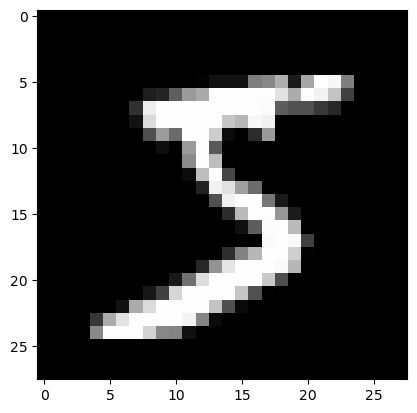

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

### [islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [ ]:
from itertools import islice

In [ ]:
islice.__class__

type

In [ ]:
help(islice)

Help on class islice in module itertools:

class islice(builtins.object)
 |  islice(iterable, stop) --> islice object
 |  islice(iterable, start, stop[, step]) --> islice object
 |  
 |  Return an iterator whose next() method returns selected values from an
 |  iterable.  If start is specified, will skip all preceding elements;
 |  otherwise, start defaults to zero.  Step defaults to one.  If
 |  specified as another value, step determines how many values are
 |  skipped between successive calls.  Works like a slice() on a list
 |  but returns an iterator.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  -------------------------------------------------------------

In [ ]:
vals
len(vals)

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

10

In [ ]:
it = iter(vals)
islice(it, 5)

<itertools.islice>

In [ ]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [ ]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [ ]:
list(islice(it, 5))

[]

In [ ]:
check(iter)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function iter>

__doc__:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


### islice, iter, chunks_faster
why using `islice` and `iter` over `chunks`

In [ ]:
%timeit -n 10 it = iter(lst1)

54.2 ns ± 17.1 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 img = list(iter(lambda: list(islice(it, 28)), []))

449 ns ± 151 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
len(img)

28

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [ ]:
%timeit -n 10 img = list(chunks(lst1, 28))

3.48 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
len(img)

28

In [ ]:
type(x_train[0])
x_train[0].shape
x_train[0].size

numpy.ndarray

(784,)

784

In [ ]:
#| export groundup
def chunks_faster(x, sz):
    "if the data is numpy.ndarray and shape is 1 dimension, then we use chunks to make it a pseudo 2d"
    lst = list(x)
    it = iter(lst)
    img = list(iter(lambda: list(islice(it, sz)), []))
    print(f'len: {len(img)}')
    return img

In [ ]:
img = chunks_faster(x_train[0], 28)

len: 28


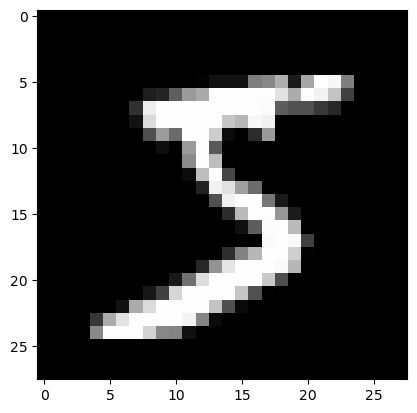

In [ ]:
plt.imshow(img);

## Matrix and tensor

### list and Matrix

In [ ]:
type(img)

list

In [ ]:
img[20][15]

0.98828125

In [ ]:
#| export groundup
class Matrix:
    "turning a list of list into a maxtrix like object"
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20,15]
type(m)

0.98828125

__main__.Matrix

### tensor, map, np.array

In [ ]:
import torch
from torch import tensor

In [ ]:
tensor([1,2,3])

tensor([1, 2, 3])

In [ ]:
type(x_train)
x_train.shape

numpy.ndarray

(50000, 784)

In [ ]:
check(tensor)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method tensor of type object>

__doc__:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

### tensor.type, tensor.reshape

In [ ]:
check(x_train.type)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method type of Tensor object>

__doc__:
type(dtype=None, non_blocking=False, **kwargs) -> str or Tensor
Returns the type if `dtype` is not provided, else casts this object to
the specified type.

If this is already of the correct type, no copy is performed and the
original object is returned.

Args:
    dtype (dtype or string): The desired type
    non_blocking (bool): If ``True``, and the source is in pinned memory
        and destination is on the GPU or vice versa, the copy is performed
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
x_train.type()

'torch.FloatTensor'

In [ ]:
check(x_train.reshape)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method reshape of Tensor object>

__doc__:
reshape(*shape) -> Tensor

Returns a tensor with the same data and number of elements as :attr:`self`
but with the specified shape. This method returns a view if :attr:`shape` is
compatible with the current shape. See :meth:`torch.Tensor.view` on when it is
possible to return a view.

See :func:`torch.reshape`

Args:
    shape (tuple of ints or int...): the desired shape
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(torch.reshape)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method reshape of type object>

__doc__:
reshape(input, shape) -> Tensor

Returns a tensor with the same data and number of elements as :attr:`input`,
but with the specified shape. When possible, the returned tensor will be a view
of :attr:`input`. Otherwise, it will be a copy. Contiguous inputs and inputs
with compatible strides can be reshaped without copying, but you should not
depend on the copying vs. viewing behavior.

See :meth:`torch.Tensor.view` on when it is possible to return a view.

A single dimension may be -1, in which case it's inferred from the remaining
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
%whos Tensor

Variable   Type      Data/Info
------------------------------
x_train    Tensor    tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
x_valid    Tensor    tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
y_train    Tensor    tensor([5, 0, 4,  ..., 8, 4, 8])
y_valid    Tensor    tensor([3, 8, 6,  ..., 5, 6, 8])


In [ ]:
imgs = x_train.reshape((-1,28,28))

In [ ]:
imgs.shape

torch.Size([50000, 28, 28])

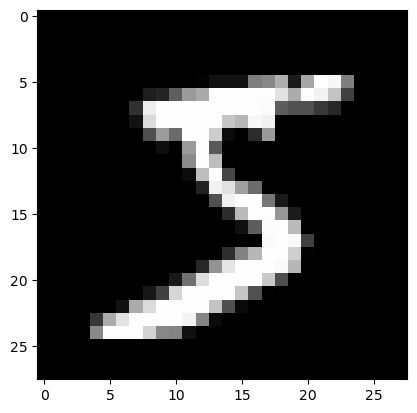

In [ ]:
plt.imshow(imgs[0]);

In [ ]:
imgs[0,20,15]

tensor(0.9883)

### torch.shape

In [ ]:
check(x_train.shape)

signature: None
__class__: <class 'torch.Size'>
__repr__: torch.Size([50000, 784])

__doc__: not exist

__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(torch.Size)

signature: (iterable=(), /)
__class__: <class 'type'>
__repr__: <class 'torch.Size'>

__doc__: not exist

__dict__: 
mappingproxy({'__add__': <slot wrapper '__add__' of 'torch.Size' objects>,
              '__doc__': None,
              '__getitem__': <slot wrapper '__getitem__' of 'torch.Size' objects>,
              '__mul__': <slot wrapper '__mul__' of 'torch.Size' objects>,
              '__new__': <built-in method __new__ of type object>,
              '__reduce__': <method '__reduce__' of 'torch.Size' objects>,
              '__repr__': <slot wrapper '__repr__' of 'torch.Size' objects>,
              '__rmul__': <slot wrapper '__rmul__' of 'torch.Size' objects>,
              'numel': <method 'numel' of 'torch.Size' objects>})
metaclass: False
class: True
decorator: False
function: False
method: False


In [ ]:
x_train.shape
n,c = x_train.shape
n,c

torch.Size([50000, 784])

(50000, 784)

In [ ]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [ ]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [ ]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

### divmod, seed, rand
Create your own random number between 0 and 1

In [ ]:
divmod(10, 3)

(3, 1)

In [ ]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [ ]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [ ]:
5%2
5%3

1

2

In [ ]:
#| export groundup
def rand():
    "create a random number between 0 and 1"
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [ ]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [ ]:
check(os.fork)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function fork>

__doc__:
Fork a child process.

Return 0 to child process and PID of child to parent process.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(os._exit)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function _exit>

__doc__:
Exit to the system with specified status, without normal exit processing.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(os.EX_OK)

signature: None
__class__: <class 'int'>
__repr__: 0

__doc__:
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.2364])
In child: tensor([0.2364])


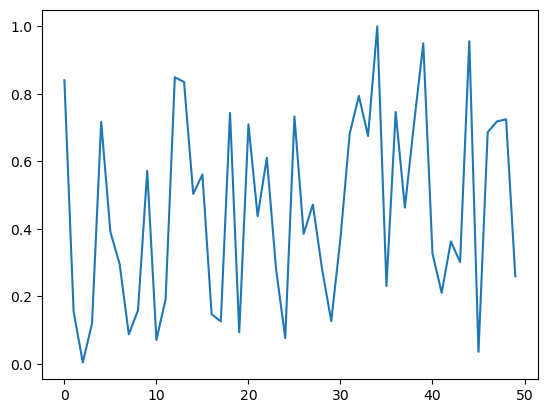

In [ ]:
plt.plot([rand() for _ in range(50)]);

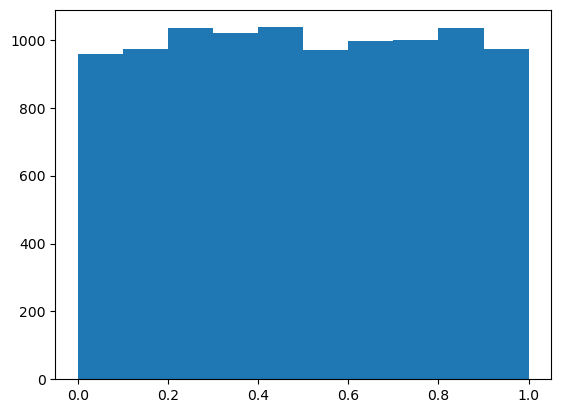

In [ ]:
plt.hist([rand() for _ in range(10000)]);

### torch.randn
much faster than rand from scratch

In [ ]:
check(torch.randn)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method randn of type object>

__doc__:
randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random numbers from a normal distribution
with mean `0` and variance `1` (also called the standard normal
distribution).

.. math::
    \text{out}_{i} \sim \mathcal{N}(0, 1)

The shape of the tensor is defined by the variable argument :attr:`size`.

__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.26 ms ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784,10)

99.2 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
rd = torch.randn(1, 1,784,10)
rd.shape
rd[:5].shape

torch.Size([1, 1, 784, 10])

torch.Size([1, 1, 784, 10])

## Matrix multiplication

### matmul_3loops, torch.zeros

In [ ]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [ ]:
weights[0,:]
len(weights[0,:])
bias
len(bias)

tensor([-1.3237,  1.1737,  0.3392,  0.2210,  0.6607,  1.8192,  0.5331,  1.0146,
         0.7724, -0.2601])

10

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

10

In [ ]:
m1 = x_valid[:5] # as input
m2 = weights # as layer1 weights

In [ ]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [ ]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [ ]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [ ]:
t1

tensor([[ 13.9416,  -2.0733,   7.3798,   4.8941,   9.7936,  11.2293,  -5.6609,
           2.7170,   1.6722,   0.6240],
        [ -3.9407,   8.6393,   1.4139,   3.4698,  -0.4061,  -6.5177,  -2.3376,
           8.8883,   8.4269,   2.1366],
        [  3.9033,   5.0146,  12.8683,  -8.9402,  11.4366,  31.3686,   3.2794,
           2.2839,  11.1379,   0.6423],
        [  6.6159,   1.9588,   2.2625,  12.5532,   5.5336,   0.8998,   0.5374,
           7.7319,  -0.2104,   0.8249],
        [ -5.4877,  19.7717,  12.5163,  -2.7179,   7.1121,   5.9905,  -2.4888,
           6.5958,  22.2492, -10.1361]])

In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
#| export groundup
def matmul_3loops(a, b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar): # ar == 5
        for j in range(bc): # bc == 10
            for k in range(ac): c[i,j] += a[i,k] * b[k,j] # ac == 784

    print(f'shapes => a: {a.shape}, b: {b.shape}, res: {c.shape}')
    return c

In [ ]:
matmul_3loops(m1,m2)

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])


tensor([[ 13.9416,  -2.0733,   7.3798,   4.8941,   9.7936,  11.2293,  -5.6609,
           2.7170,   1.6722,   0.6240],
        [ -3.9407,   8.6393,   1.4139,   3.4698,  -0.4061,  -6.5177,  -2.3376,
           8.8883,   8.4269,   2.1366],
        [  3.9033,   5.0146,  12.8683,  -8.9402,  11.4366,  31.3686,   3.2794,
           2.2839,  11.1379,   0.6423],
        [  6.6159,   1.9588,   2.2625,  12.5532,   5.5336,   0.8998,   0.5374,
           7.7319,  -0.2104,   0.8249],
        [ -5.4877,  19.7717,  12.5163,  -2.7179,   7.1121,   5.9905,  -2.4888,
           6.5958,  22.2492, -10.1361]])

### torch.set_printoptions, np.set_printoptions

In [ ]:
import numpy as np

In [ ]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
np.set_printoptions(precision=2, linewidth=140)
t1

tensor([[ 13.94,  -2.07,   7.38,   4.89,   9.79,  11.23,  -5.66,   2.72,   1.67,   0.62],
        [ -3.94,   8.64,   1.41,   3.47,  -0.41,  -6.52,  -2.34,   8.89,   8.43,   2.14],
        [  3.90,   5.01,  12.87,  -8.94,  11.44,  31.37,   3.28,   2.28,  11.14,   0.64],
        [  6.62,   1.96,   2.26,  12.55,   5.53,   0.90,   0.54,   7.73,  -0.21,   0.82],
        [ -5.49,  19.77,  12.52,  -2.72,   7.11,   5.99,  -2.49,   6.60,  22.25, -10.14]])

In [ ]:
%time _=matmul_3loops(m1, m2)

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])
CPU times: user 334 ms, sys: 2.33 ms, total: 336 ms
Wall time: 336 ms


## Numba
Numba is an open source JIT compiler that translates a subset of Python and NumPy code into fast machine code.

### njit, dot, np.array

In [ ]:
#| export groundup
import numba

In [ ]:
check(numba)

signature: None
__class__: <class 'module'>
__repr__: <module 'numba' from '/Users/Natsume/mambaforge/lib/python3.9/site-packages/numba/__init__.py'>

__doc__:
Expose top-level symbols that are safe for import *
__dict__: 
{'ByteCodeSupportError': <class 'numba.core.errors.ByteCodeSupportError'>,
 'CompilerError': <class 'numba.core.errors.CompilerError'>,
 'ConstantInferenceError': <class 'numba.core.errors.ConstantInferenceError'>,
 'DeprecationError': <class 'numba.core.errors.DeprecationError'>,
 'ForbiddenConstruct': <class 'numba.core.errors.ForbiddenConstruct'>,
 'ForceLiteralArg': <class 'numba.core.errors.ForceLiteralArg'>,
 'IRError': <class 'numba.core.errors.IRError'>,
 'InternalError': <class 'numba.core.errors.InternalError'>,
 'InternalTargetMismatchError': <class 'numba.core.errors.InternalTargetMismatchError'>,
 'LiteralTypingError': <class 'numba.core.errors.LiteralTypingError'>,
 'LoweringError': <class 'numba.core.errors.LoweringError'>,
 'NotDefinedError': <class '

In [ ]:
whatinside(numba)

numba has: 
113 items in its __all__, and 
28 user defined functions, 
43 classes or class objects, 
0 builtin funcs and methods, and
123 callables.

Expose top-level symbols that are safe for import *


In [ ]:
#| export groundup
from numba import njit, jit

In [ ]:
check(njit)

signature: (*args, **kws)
__class__: <class 'function'>
__repr__: <function njit>

__doc__:
Equivalent to jit(nopython=True)

See documentation for jit function/decorator for full description.
__dict__: 
{}
metaclass: False
class: False
decorator: False
function: True
method: False


In [ ]:
check(jit)

signature: (signature_or_function=None, locals={}, cache=False, pipeline_class=None, boundscheck=None, **options)
__class__: <class 'function'>
__repr__: <function jit>

__doc__:
This decorator is used to compile a Python function into native code.

Args
-----
signature_or_function:
    The (optional) signature or list of signatures to be compiled.
    If not passed, required signatures will be compiled when the
    decorated function is called, depending on the argument values.
    As a convenience, you can directly pass the function to be compiled
    instead.

__dict__: 
{}
metaclass: False
class: False
decorator: False
function: True
method: False


In [ ]:
#| export groundup
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [ ]:
from numpy import array

In [ ]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 174 ms, sys: 20.8 ms, total: 195 ms
Wall time: 219 ms


20.0

In [ ]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 20 µs, sys: 1 µs, total: 21 µs
Wall time: 21 µs


20.0

In [ ]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 29 µs, sys: 1 µs, total: 30 µs
Wall time: 31 µs


20.0

### matmul_2loops_njit, m1.numpy()

Now only two of our loops are running in Python, and the third loop is running in machine code

In [ ]:
#| export groundup
def matmul_2loops_njit(a,b):
    "doing matrix multiplication with 2 python loops and 1 loop in machine code"
    a,b = a.numpy(),b.numpy() # njit or numba don't work with torch.tensor but numpy array
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [ ]:
matmul_2loops_njit(m1,m2)

tensor([[ 13.94,  -2.07,   7.38,   4.89,   9.79,  11.23,  -5.66,   2.72,   1.67,   0.62],
        [ -3.94,   8.64,   1.41,   3.47,  -0.41,  -6.52,  -2.34,   8.89,   8.43,   2.14],
        [  3.90,   5.01,  12.87,  -8.94,  11.44,  31.37,   3.28,   2.28,  11.14,   0.64],
        [  6.62,   1.96,   2.26,  12.55,   5.53,   0.90,   0.54,   7.73,  -0.21,   0.82],
        [ -5.49,  19.77,  12.52,  -2.72,   7.11,   5.99,  -2.49,   6.60,  22.25, -10.14]])

In [ ]:
check(m1.numpy)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method numpy of Tensor object>

__doc__:
numpy() -> numpy.ndarray

Returns :attr:`self` tensor as a NumPy :class:`ndarray`. This tensor and the
returned :class:`ndarray` share the same underlying storage. Changes to
:attr:`self` tensor will be reflected in the :class:`ndarray` and vice versa.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
m1a,m2a = m1.numpy(),m2.numpy()

In [ ]:
m1.shape, m1a.shape

(torch.Size([5, 784]), (5, 784))

### test_close, %timeit, %time

In [ ]:
from fastcore.test import *

In [ ]:
test_close(matmul_3loops(m1, m2),matmul_2loops_njit(m1, m2))

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])


In [ ]:
%timeit -n 10 matmul_2loops_njit(m1,m2)

259 µs ± 160 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%time _=matmul_2loops_njit(m1,m2)

CPU times: user 376 µs, sys: 160 µs, total: 536 µs
Wall time: 379 µs


## Elementwise ops

[TryAPL](https://tryapl.org/)

### elementwise by tensor

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
(a < b).float().mean()

tensor(0.67)

In [ ]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste. This is the source LaTeX that I pasted to render the equation above:

```latex
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [ ]:
(m*m).sum().sqrt()

tensor(16.88)

In [ ]:
check(m.sum)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method sum of Tensor object>

__doc__:
sum(dim=None, keepdim=False, dtype=None) -> Tensor

See :func:`torch.sum`
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(torch.sum)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method sum of type object>

__doc__:
sum(input, *, dtype=None) -> Tensor

Returns the sum of all elements in the :attr:`input` tensor.

Args:
    input (Tensor): the input tensor.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        If specified, the input tensor is casted to :attr:`dtype` before the operation
        is performed. This is useful for preventing data type overflows. Default: None.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


### matmul_2loops_elementwise

In [ ]:
#| export groundup
def matmul_2loops_elementwise(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [ ]:
test_close(matmul_3loops(m1,m2), matmul_2loops_elementwise(m1, m2))

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])


In [ ]:
%time _=matmul_3loops(m1, m2)

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])
CPU times: user 336 ms, sys: 3.59 ms, total: 340 ms
Wall time: 340 ms


In [ ]:
%time _=matmul_2loops_njit(m1, m2)

CPU times: user 335 µs, sys: 198 µs, total: 533 µs
Wall time: 322 µs


In [ ]:
%time _=matmul_2loops_elementwise(m1, m2)

CPU times: user 635 µs, sys: 370 µs, total: 1.01 ms
Wall time: 613 µs


### matmul_2loops_dotproduct

In [ ]:
#| export groundup
def matmul_2loops_dotproduct(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [ ]:
test_close(t1,matmul_2loops_dotproduct(m1, m2))

In [ ]:
%timeit -n 10 _=matmul_2loops_dotproduct(m1, m2)

393 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%time _=matmul_2loops_njit(m1, m2)

CPU times: user 380 µs, sys: 230 µs, total: 610 µs
Wall time: 389 µs


In [ ]:
%time _=matmul_2loops_elementwise(m1, m2)

CPU times: user 654 µs, sys: 410 µs, total: 1.06 ms
Wall time: 686 µs


In [ ]:
%time _=matmul_2loops_dotproduct(m1, m2)

CPU times: user 584 µs, sys: 323 µs, total: 907 µs
Wall time: 576 µs


## Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

### Broadcasting with a scalar
How a scalar is broadcasted to do operation with a matrix

In [ ]:
a

tensor([10.,  6., -4.])

In [ ]:
a > 0

tensor([ True,  True, False])

How are we able to do `a > 0`?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [ ]:
a + 1

tensor([11.,  7., -3.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix

Although broadcasting a scalar is an idea that dates back to APL, the more powerful idea of broadcasting across higher rank tensors [comes from](https://mail.python.org/pipermail/matrix-sig/1995-November/000143.html) a little known language called [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html).

We can also broadcast a vector to a matrix, when the vector's shape is a scalar

In [ ]:
c = tensor([10.,20,30]); 
c

tensor([10., 20., 30.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

#### c.expand_as(m), t.storage(), t.stride()

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [ ]:
check(c.expand_as)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method expand_as of Tensor object>

__doc__:
expand_as(other) -> Tensor

Expand this tensor to the same size as :attr:`other`.
``self.expand_as(other)`` is equivalent to ``self.expand(other.size())``.

Please see :meth:`~Tensor.expand` for more information about ``expand``.

Args:
    other (:class:`torch.Tensor`): The result tensor has the same size
        as :attr:`other`.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
t = c.expand_as(m)

In [ ]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
check(t.storage)

signature: ()
__class__: <class 'method'>
__repr__: <bound method Tensor.storage of tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])>

__doc__:
storage() -> torch.Storage

Returns the underlying storage.
__dict__: 
{}
metaclass: False
class: False
decorator: False
function: False
method: True


In [ ]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [ ]:
check(t.stride)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method stride of Tensor object>

__doc__:
stride(dim) -> tuple or int

Returns the stride of :attr:`self` tensor.

Stride is the jump necessary to go from one element to the next one in the
specified dimension :attr:`dim`. A tuple of all strides is returned when no
argument is passed in. Otherwise, an integer value is returned as the stride in
the particular dimension :attr:`dim`.

Args:
    dim (int, optional): the desired dimension in which stride is required
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

### c.unsqueeze(0), c[None,:], c.unsqueeze(1), c[:, None]

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [ ]:
c
c.shape

tensor([10., 20., 30.])

torch.Size([3])

In [ ]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [ ]:
c.unsqueeze(0).shape
c[None, :].shape

torch.Size([1, 3])

torch.Size([1, 3])

In [ ]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [ ]:
c.shape
c.unsqueeze(1).shape
c[:, None].shape

torch.Size([3])

torch.Size([3, 1])

torch.Size([3, 1])

#### c[None], c[..., None]
You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [ ]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

### Broadcast a one-row/col matrix

In [ ]:
# c[None,:].expand_as(m)
c[None].expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [ ]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [ ]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

### Broadcasting Rules
how to broadcast two 1-row/col matricies

In [ ]:
c[None,:]

tensor([[10., 20., 30.]])

In [ ]:
c[None,:].shape

torch.Size([1, 3])

In [ ]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[:,None].shape

torch.Size([3, 1])

In [ ]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

### Practice Broadcasting
Very helpful [examples](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) to solidify my practical understanding of Broadcasting.


## Matmul with broadcasting

### matmul_1loop_broadcast

In [ ]:
rowZero = m1[0]
rowZero.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [ ]:
rowZero[:,None].shape # make rowZero flip from horizontal to vertical

torch.Size([784, 1])

In [ ]:
rowZero[:,None].expand_as(m2).shape # broadcast from one column to 10 columns to match m2

torch.Size([784, 10])

In [ ]:
(rowZero[:,None]*m2).shape # (broadcast vertically) vector * matrix 

torch.Size([784, 10])

In [ ]:
(rowZero[:,None]*m2).sum(dim=0) 
# dim=0, smash vertically to the ground so that we just have one row as output
# dim=1, smash horizontal to the left/right so that we just have one column as output

tensor([13.94, -2.07,  7.38,  4.89,  9.79, 11.23, -5.66,  2.72,  1.67,  0.62])

In [ ]:
#| export groundup
def matmul_1loop_broadcast(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [ ]:
test_close(matmul_3loops(m1,m2),matmul_1loop_broadcast(m1, m2))

shapes => a: torch.Size([5, 784]), b: torch.Size([784, 10]), res: torch.Size([5, 10])


In [ ]:
%timeit -n 10 _=matmul_1loop_broadcast(m1, m2)

57.4 µs ± 8.95 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%time _=matmul_2loops_njit(m1,m2)
%time _=matmul_2loops_elementwise(m1,m2)
%time _=matmul_2loops_dotproduct(m1,m2)
%time _=matmul_1loop_broadcast(m1,m2)

CPU times: user 364 µs, sys: 237 µs, total: 601 µs
Wall time: 370 µs
CPU times: user 600 µs, sys: 32 µs, total: 632 µs
Wall time: 639 µs
CPU times: user 397 µs, sys: 1e+03 ns, total: 398 µs
Wall time: 399 µs
CPU times: user 79 µs, sys: 0 ns, total: 79 µs
Wall time: 80.8 µs


### matmul on x_train and weights

Our time has gone from ~500ms to <0.1ms, an over 5000x improvement! We can run on the whole dataset now.

In [ ]:
tr = matmul_1loop_broadcast(x_train, weights)

In [ ]:
tr.shape

torch.Size([50000, 10])

In [ ]:
%time _=matmul_2loops_njit(x_train, weights)
%time _=matmul_2loops_elementwise(x_train, weights)
%time _=matmul_2loops_dotproduct(x_train, weights)
%time _=matmul_1loop_broadcast(x_train, weights)

CPU times: user 2.25 s, sys: 513 ms, total: 2.76 s
Wall time: 1.87 s
CPU times: user 4.34 s, sys: 500 ms, total: 4.84 s
Wall time: 4.06 s
CPU times: user 4.09 s, sys: 517 ms, total: 4.61 s
Wall time: 3.56 s
CPU times: user 1 s, sys: 507 ms, total: 1.51 s
Wall time: 501 ms


## matmul_einsum_noloop

[Einstein summation](https://ajcr.net/Basic-guide-to-einsum/) ([`einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)) is a compact representation for combining products and sums in a general way. The key rules are:

- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed.

In [ ]:
#| export groundup
def matmul_einsum_noloop(a,b): return torch.einsum('ik,kj->ij', a, b)
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()

In [ ]:
test_close(tr, matmul_einsum_noloop(x_train, weights), eps=1e-3) # question: why 1e-3

In [ ]:
%time _=matmul_2loops_njit(x_train, weights)
%time _=matmul_2loops_elementwise(x_train, weights)
%time _=matmul_2loops_dotproduct(x_train, weights)
%time _=matmul_1loop_broadcast(x_train, weights)
%time _=matmul_einsum_noloop(x_train, weights)

CPU times: user 2.2 s, sys: 490 ms, total: 2.69 s
Wall time: 1.82 s
CPU times: user 4.36 s, sys: 499 ms, total: 4.86 s
Wall time: 4.01 s
CPU times: user 4.13 s, sys: 525 ms, total: 4.65 s
Wall time: 3.71 s
CPU times: user 898 ms, sys: 467 ms, total: 1.36 s
Wall time: 513 ms
CPU times: user 160 ms, sys: 16.1 ms, total: 176 ms
Wall time: 25 ms


## torch.matmul or x_train@weights

We can use pytorch's function or operator directly for matrix multiplication.

In [ ]:
test_close(tr, x_train@weights, eps=1e-3)

In [ ]:
%time _=matmul_2loops_njit(x_train, weights)
%time _=matmul_2loops_elementwise(x_train, weights)
%time _=matmul_2loops_dotproduct(x_train, weights)
%time _=matmul_1loop_broadcast(x_train, weights)
%time _=matmul_einsum_noloop(x_train, weights)
%time _=torch.matmul(x_train, weights)

CPU times: user 2.23 s, sys: 521 ms, total: 2.75 s
Wall time: 1.83 s
CPU times: user 4.34 s, sys: 502 ms, total: 4.84 s
Wall time: 3.99 s
CPU times: user 4.12 s, sys: 497 ms, total: 4.62 s
Wall time: 3.62 s
CPU times: user 1.12 s, sys: 528 ms, total: 1.64 s
Wall time: 505 ms
CPU times: user 174 ms, sys: 11.8 ms, total: 186 ms
Wall time: 25 ms
CPU times: user 171 ms, sys: 11.1 ms, total: 182 ms
Wall time: 25.3 ms


## CUDA
run from kaggle [notebook](https://www.kaggle.com/code/danielliao/course22p2-0001-matmul/edit/run/107870903)

In [ ]:
def matmul(grid, a,b,c):
    i,j = grid 
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]  # this is the 3rd loop
        c[i,j] = tmp

In [ ]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-17.70,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x): # the 1st loop
        for j in range(grid_y): kernel((i,j), *args, **kwargs) # the 2nd loop

In [ ]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-17.70,  -8.61,  12.17, -15.78,   5.78, -14.75,  -8.66,  -4.28,  13.34,   7.52],
        [  2.51,  -0.46,  10.73, -11.62,  12.98,   2.54,  -9.66,   8.52,   6.11,  15.23],
        [ -4.33, -15.79,   1.87,   5.80,   0.38,   5.14,   3.61,  -1.90,   7.30,   9.60],
        [ -9.27,  -3.22,   7.59,   2.54,   3.17,  -2.14,  -2.51,   5.58,   8.43,   4.03],
        [ -2.47,  -2.54, -11.92,  -4.81,   0.89,   2.14,  -5.88,   9.96,  10.68,  15.94]])

In [ ]:
from numba import cuda

In [ ]:
@cuda.jit
def matmul(a,b,c):
    "the 3rd loop from python to machine code"
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp
    cuda.syncthreads()

In [ ]:
tr.shape

torch.Size([50000, 10])

In [ ]:
r = np.zeros(tr.shape)
m1g,m2g,rg = cuda.to_device(x_train),cuda.to_device(weights),cuda.to_device(r)

In [ ]:
m1g

<numba.cuda.cudadrv.devicearray.DeviceNDArray>

In [ ]:
m1g.shape

(50000, 784)

In [ ]:
r.shape

(50000, 10)

In [ ]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

In [ ]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg) # not sure about [blockspergrid, (TPB,TPB)] part
r = rg.copy_to_host()
test_close(tr, r, eps=1.03)

In [ ]:
%%timeit -n 1
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

6.91 ms ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [ ]:
%timeit -n 1 rr = (m1c@m2c).cpu()

The slowest run took 939.39 times longer than the fastest. This could mean that an intermediate result is being cached.
117 ms ± 283 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%time rr = (m1c@m2c).cpu()

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.05 ms


Our broadcasting version was >500ms, and our CUDA version is around 0.5ms, which is another 1000x improvement compared to broadcasting. So our total speedup is around 5 million times!

In [ ]:
# |hide
import nbdev
nbdev.nbdev_export()